In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# First part: Data loading and model training

load data

In [4]:
import pandas as pd

file_path = '/content/drive/MyDrive/diabetes.csv'
diabetes_data = pd.read_csv(file_path)

diabetes_data.info(), diabetes_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(None,
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0            6      148             72             35        0  33.6   
 1            1       85             66             29        0  26.6   
 2            8      183             64              0        0  23.3   
 3            1       89             66             23       94  28.1   
 4            0      137             40             35      168  43.1   
 
    DiabetesPedigreeFunction  Age  Outcome  
 0                     0.627   50        1  
 1                     0.351   31        0  
 2                     0.672   32        1  
 3                     0.167   21        0  
 4                     2.288   33        1  )

Analysis

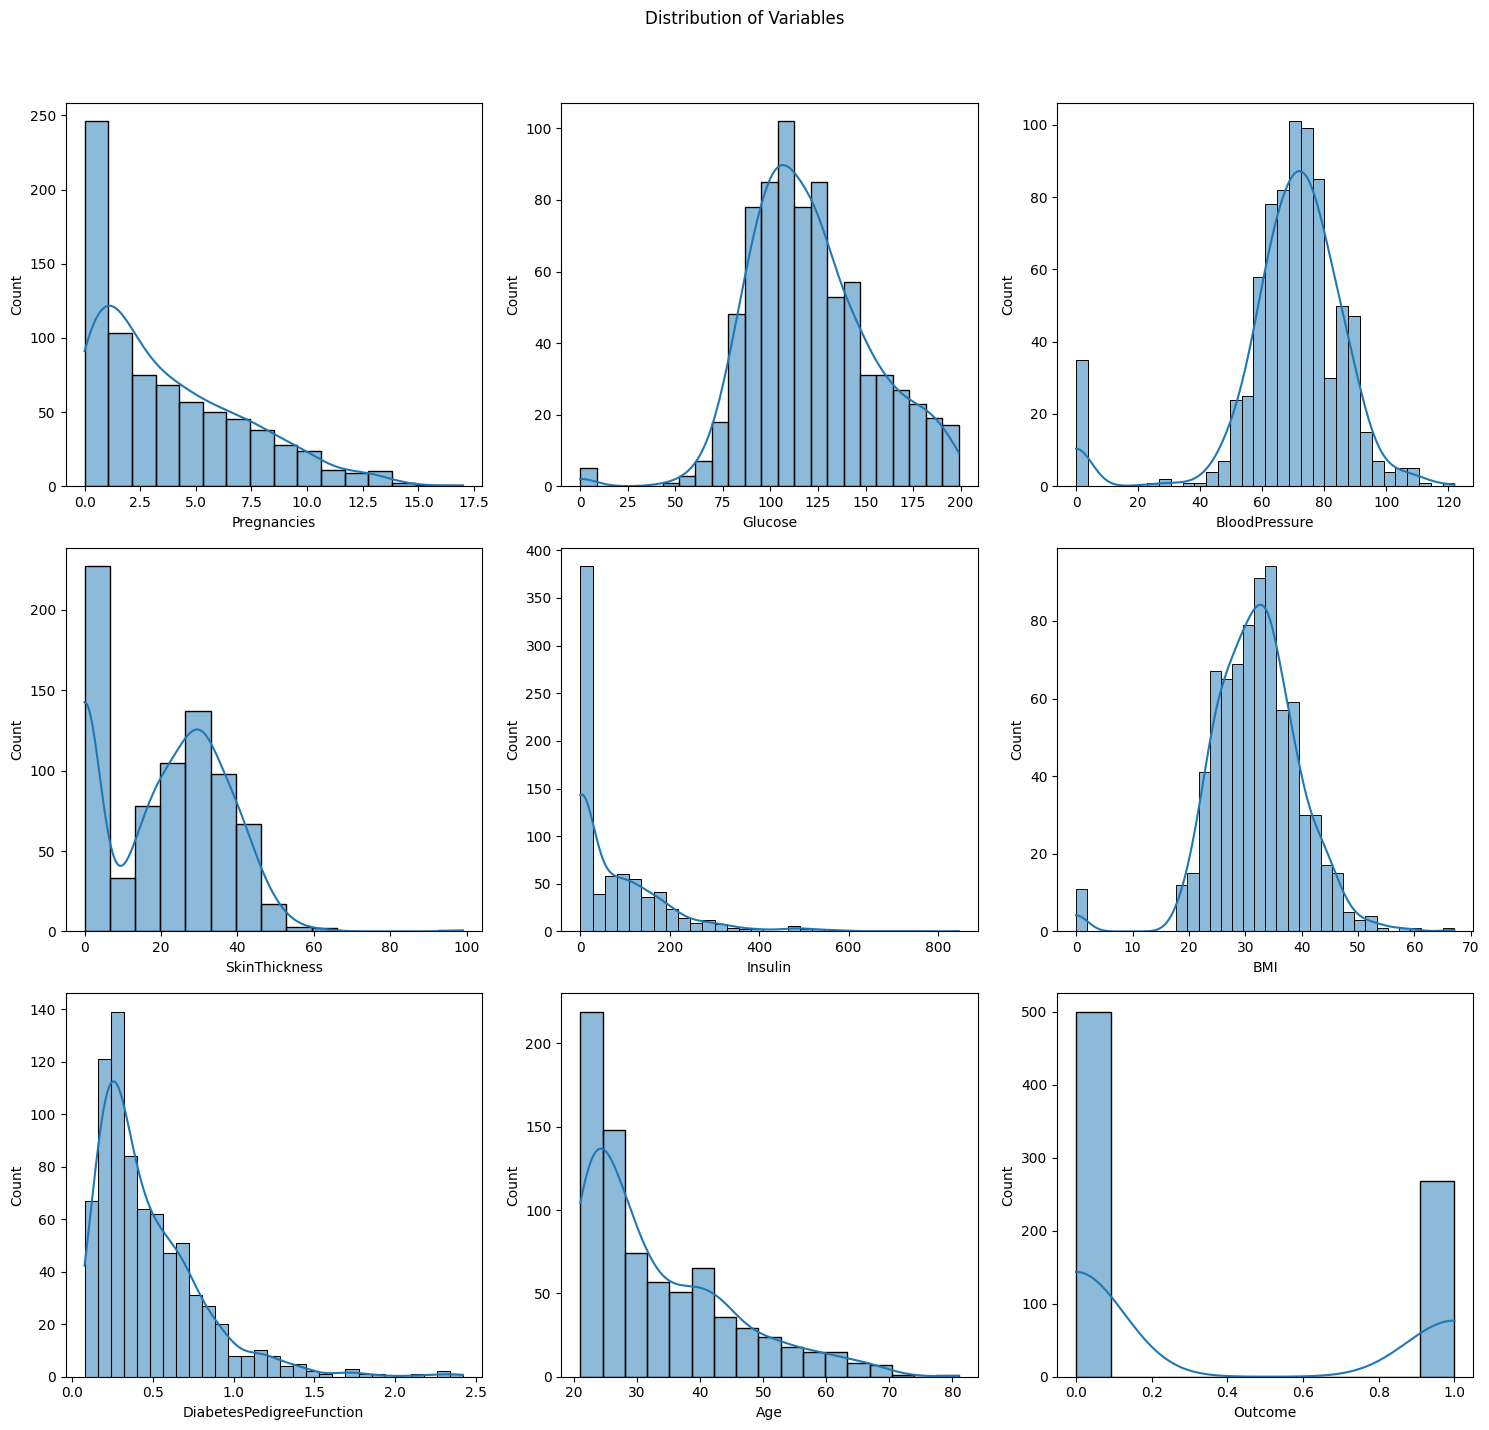

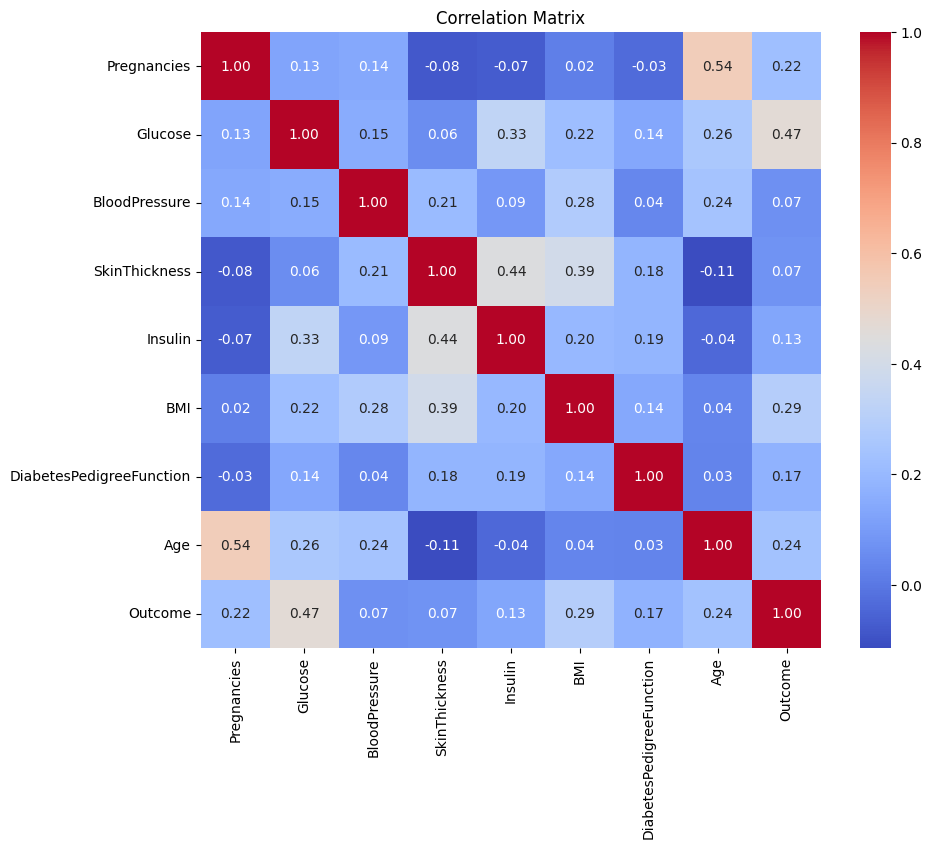

(       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
 count   768.000000  768.000000     768.000000     768.000000  768.000000   
 mean      3.845052  120.894531      69.105469      20.536458   79.799479   
 std       3.369578   31.972618      19.355807      15.952218  115.244002   
 min       0.000000    0.000000       0.000000       0.000000    0.000000   
 25%       1.000000   99.000000      62.000000       0.000000    0.000000   
 50%       3.000000  117.000000      72.000000      23.000000   30.500000   
 75%       6.000000  140.250000      80.000000      32.000000  127.250000   
 max      17.000000  199.000000     122.000000      99.000000  846.000000   
 
               BMI  DiabetesPedigreeFunction         Age     Outcome  
 count  768.000000                768.000000  768.000000  768.000000  
 mean    31.992578                  0.471876   33.240885    0.348958  
 std      7.884160                  0.331329   11.760232    0.476951  
 min      0.000000   

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


summary = diabetes_data.describe()

missing_values = diabetes_data.isnull().sum()


fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Distribution of Variables')

for i, col in enumerate(diabetes_data.columns):
    sns.histplot(diabetes_data[col], kde=True, ax=axes[i//3, i%3])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])


correlation_matrix = diabetes_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')


summary, missing_values, plt.show()


a) Dependence Matrix and Pairplot Diagram

(                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
 Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
 Glucose                      0.129459  1.000000       0.152590       0.057328   
 BloodPressure                0.141282  0.152590       1.000000       0.207371   
 SkinThickness               -0.081672  0.057328       0.207371       1.000000   
 Insulin                     -0.073535  0.331357       0.088933       0.436783   
 BMI                          0.017683  0.221071       0.281805       0.392573   
 DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
 Age                          0.544341  0.263514       0.239528      -0.113970   
 Outcome                      0.221898  0.466581       0.065068       0.074752   
 
                            Insulin       BMI  DiabetesPedigreeFunction  \
 Pregnancies              -0.073535  0.017683                 -0.033523   
 Glucose                   0

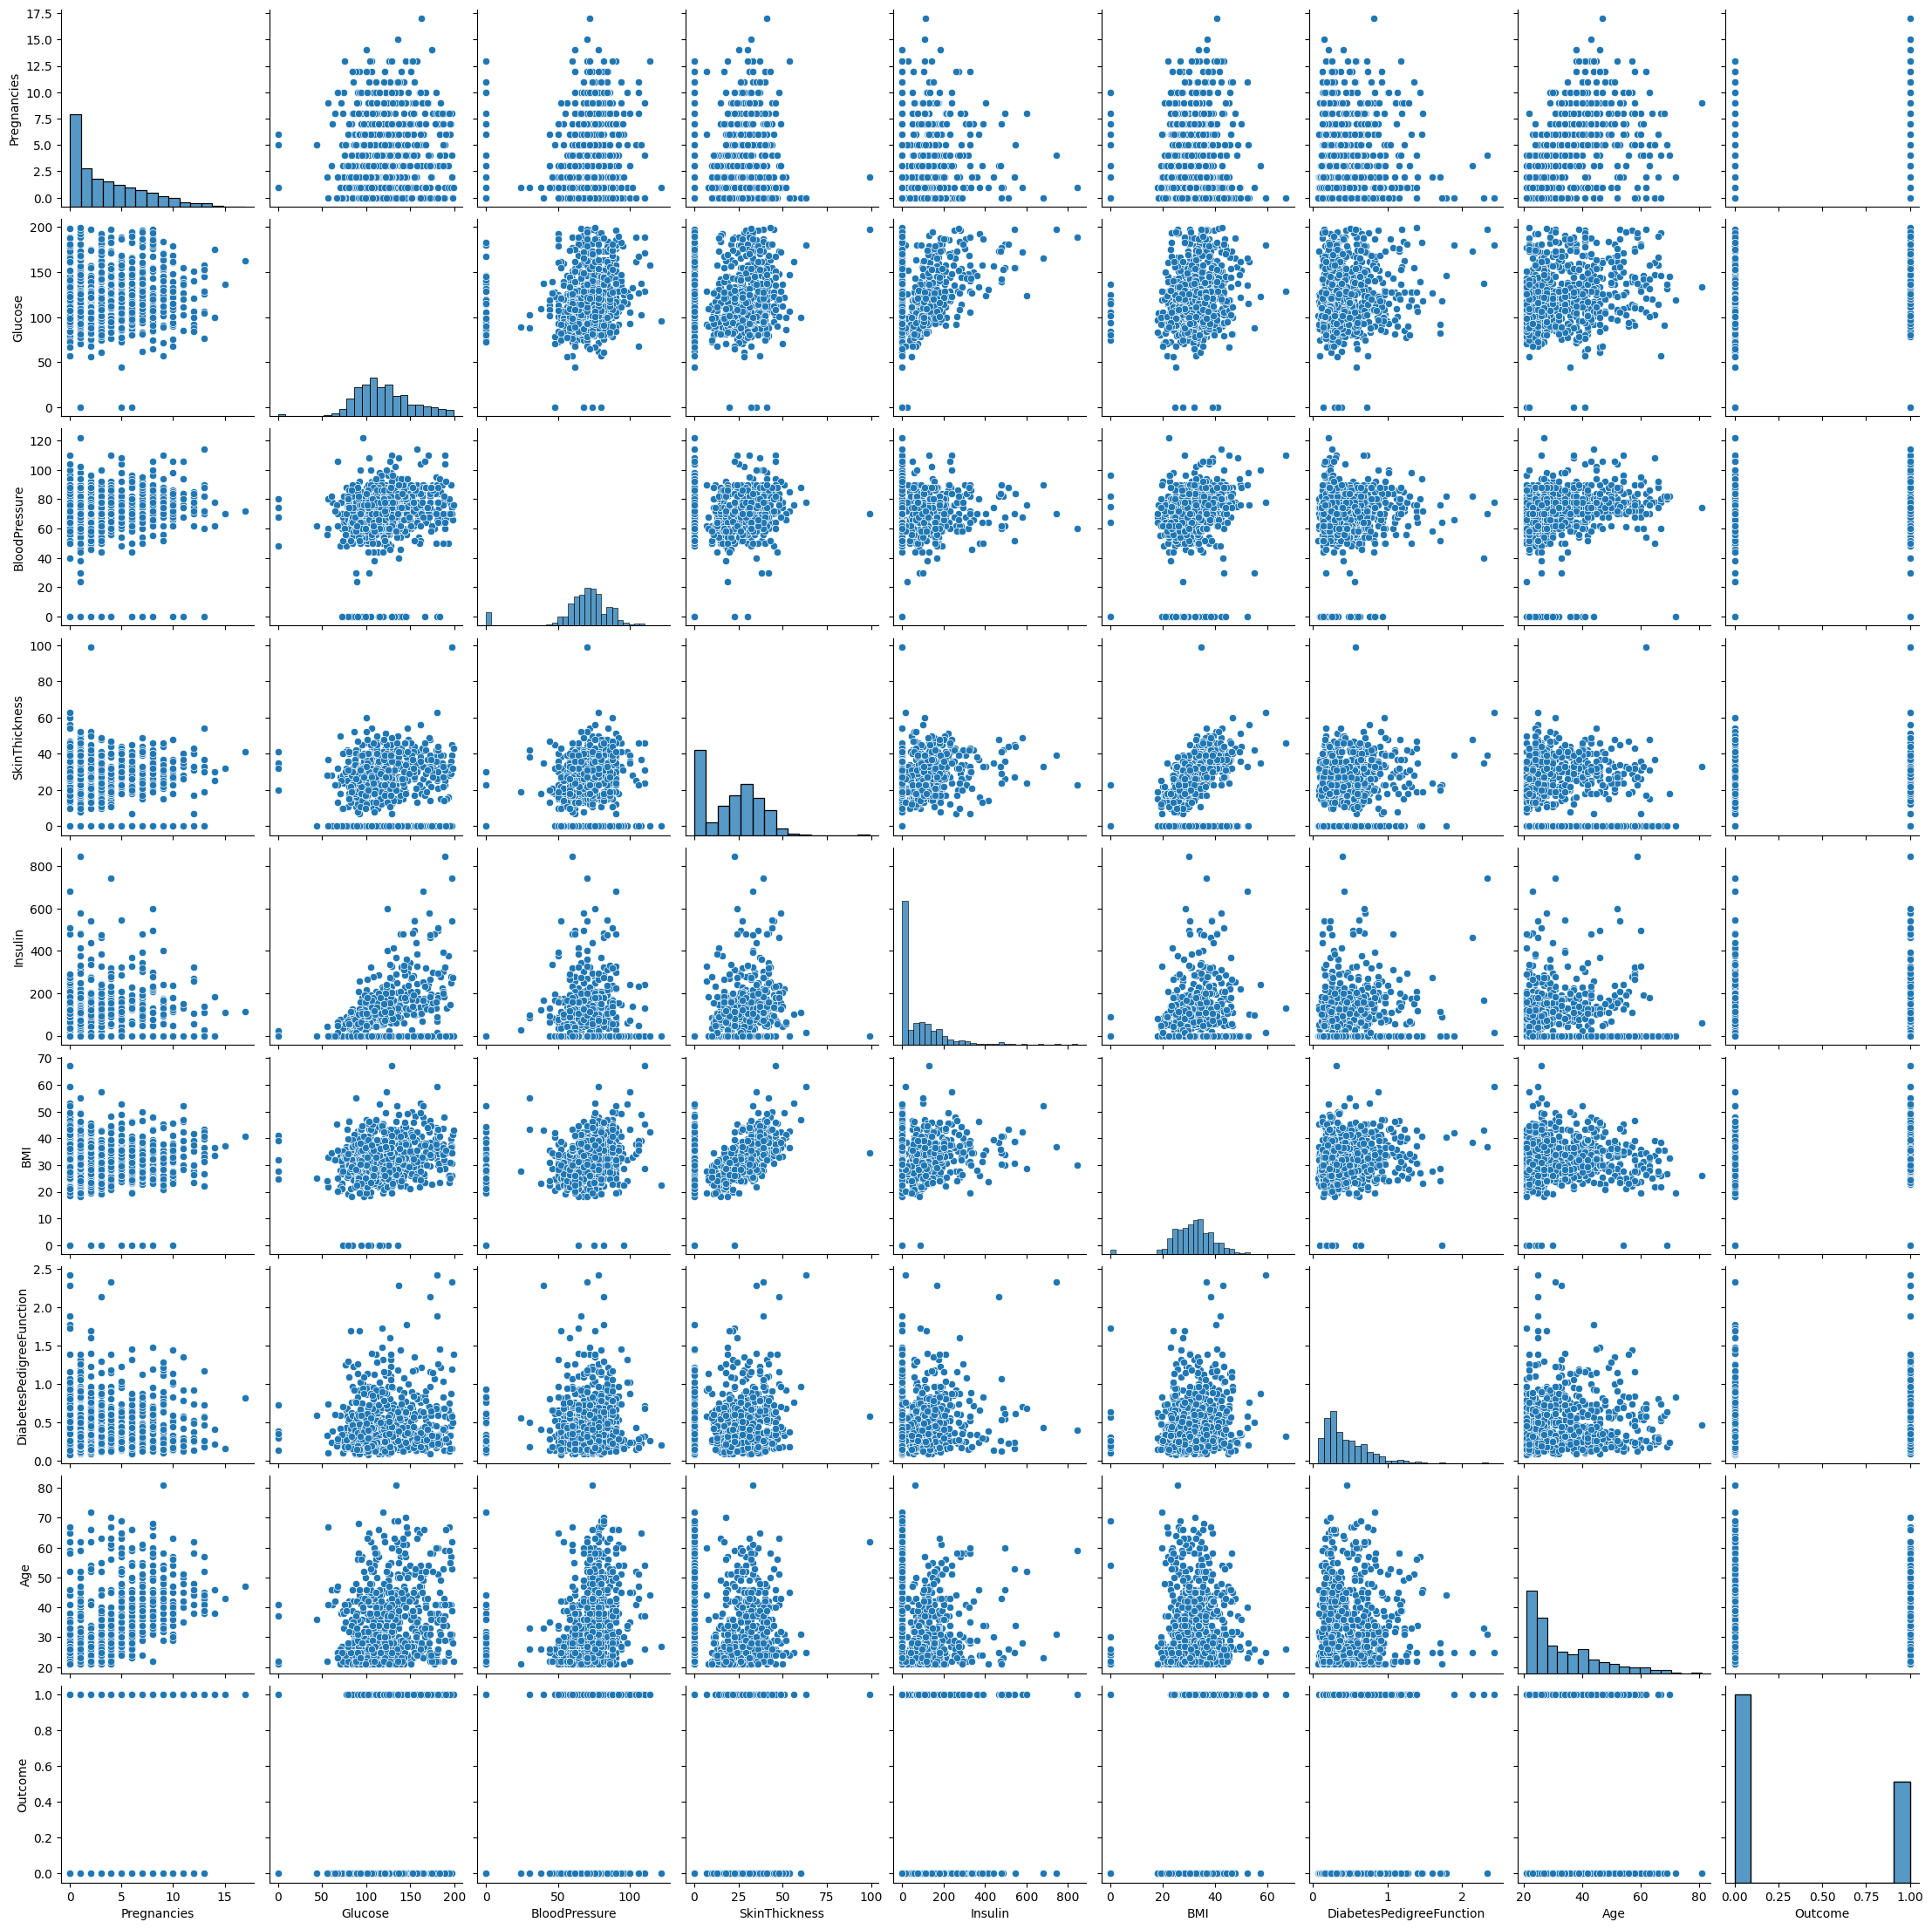

In [ ]:
pairplot = sns.pairplot(diabetes_data, diag_kind='hist')


correlation_matrix_without_outcome = correlation_matrix.drop(columns=['Outcome'], index=['Outcome'])
sorted_correlations = correlation_matrix_without_outcome.abs().unstack().sort_values(ascending=False)
top_two_pairs = sorted_correlations[sorted_correlations != 1.0].head(2)
correlation_matrix, top_two_pairs, pairplot


b) Distribution of Healthy and Infected People

<ipython-input-5-65115a2402af>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=diabetes_data, palette='viridis')


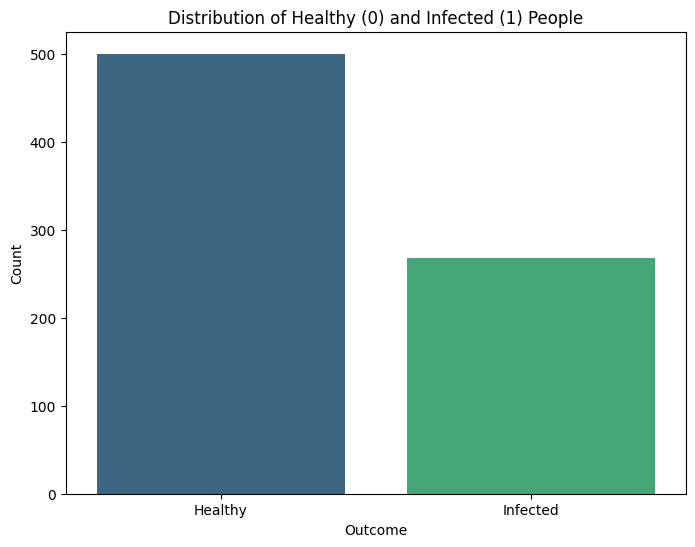

Outcome
0    500
1    268
Name: count, dtype: int64

In [ ]:
outcome_counts = diabetes_data['Outcome'].value_counts()

plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=diabetes_data, palette='viridis')
plt.title('Distribution of Healthy (0) and Infected (1) People')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks([0, 1], ['Healthy', 'Infected'])
plt.show()

outcome_counts


c) Outliers and Dispersion of Data

<ipython-input-6-f27bd021624d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=diabetes_data[column], palette='viridis')
<ipython-input-6-f27bd021624d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=diabetes_data[column], palette='viridis')
<ipython-input-6-f27bd021624d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=diabetes_data[column], palette='viridis')
<ipython-input-6-f27bd021624d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and

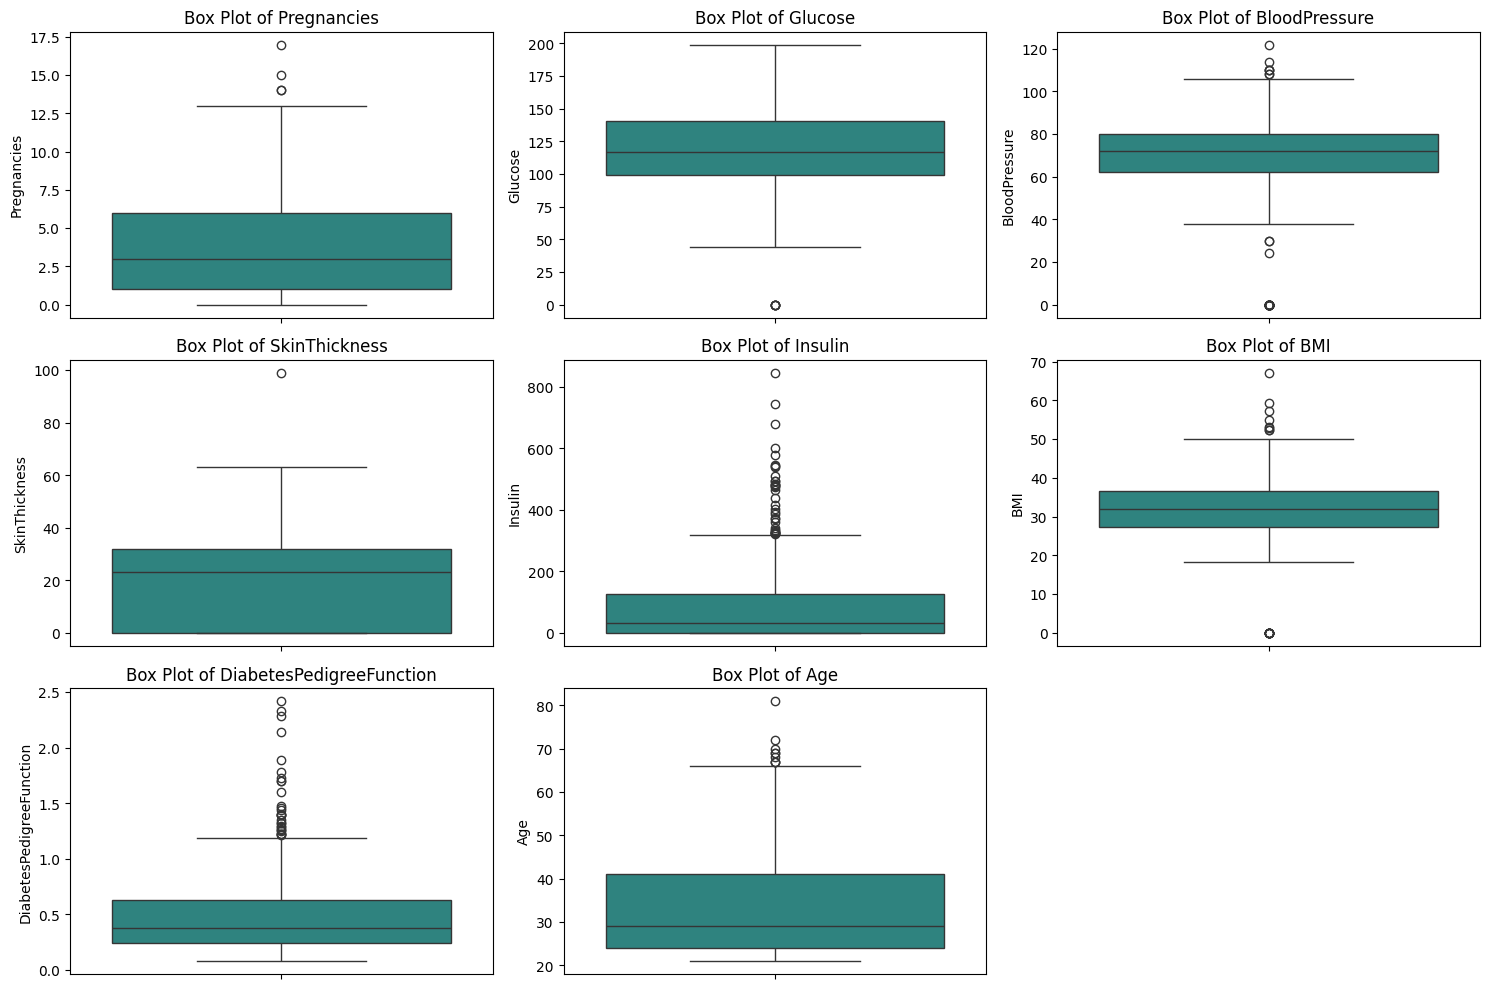

In [ ]:

plt.figure(figsize=(15, 10))
for i, column in enumerate(diabetes_data.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=diabetes_data[column], palette='viridis')
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()


Pre-processing and Data Splitting

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns_with_zeros:
    median = diabetes_data[diabetes_data[column] != 0][column].median()
    diabetes_data[column] = diabetes_data[column].replace(0, median)

scaler = StandardScaler()
features = diabetes_data.drop(columns=['Outcome'])
scaled_features = scaler.fit_transform(features)

scaled_data = pd.DataFrame(scaled_features, columns=features.columns)
scaled_data['Outcome'] = diabetes_data['Outcome']

train_data, temp_data = train_test_split(scaled_data, test_size=0.30, stratify=scaled_data['Outcome'], random_state=42)
validation_data, test_data = train_test_split(temp_data, test_size=0.33, stratify=temp_data['Outcome'], random_state=42)


len(train_data), len(validation_data), len(test_data)


(537, 154, 77)

Model training and evaluation

Epoch 1/100, Train Loss: 0.6651, Validation Loss: 0.6427
Epoch 2/100, Train Loss: 0.5642, Validation Loss: 0.5120
Epoch 3/100, Train Loss: 0.4882, Validation Loss: 0.5030
Epoch 4/100, Train Loss: 0.4521, Validation Loss: 0.5080
Epoch 5/100, Train Loss: 0.4358, Validation Loss: 0.5180
Epoch 6/100, Train Loss: 0.4379, Validation Loss: 0.5092
Epoch 7/100, Train Loss: 0.4288, Validation Loss: 0.5240
Epoch 8/100, Train Loss: 0.4137, Validation Loss: 0.5587
Epoch 9/100, Train Loss: 0.3935, Validation Loss: 0.5636
Epoch 10/100, Train Loss: 0.4034, Validation Loss: 0.5959
Epoch 11/100, Train Loss: 0.3943, Validation Loss: 0.6045
Epoch 12/100, Train Loss: 0.3942, Validation Loss: 0.5983
Epoch 13/100, Train Loss: 0.3565, Validation Loss: 0.6272
Epoch 14/100, Train Loss: 0.3667, Validation Loss: 0.6399
Epoch 15/100, Train Loss: 0.3780, Validation Loss: 0.6547
Epoch 16/100, Train Loss: 0.3614, Validation Loss: 0.6682
Epoch 17/100, Train Loss: 0.3498, Validation Loss: 0.6976
Epoch 18/100, Train Los

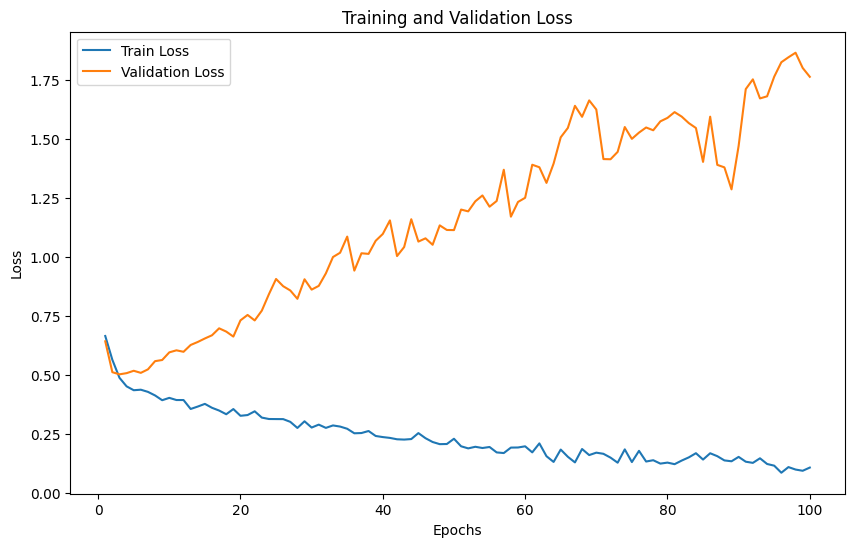

Accuracy: 0.7662
Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.88      0.83        50
         1.0       0.71      0.56      0.63        27

    accuracy                           0.77        77
   macro avg       0.75      0.72      0.73        77
weighted avg       0.76      0.77      0.76        77

Confusion Matrix:
[[44  6]
 [12 15]]


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt


class DiabetesNN(nn.Module):
    def __init__(self):
        super(DiabetesNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(8, 100),
            nn.ReLU(),
            nn.BatchNorm1d(100)
        )
        self.layer2 = nn.Sequential(
            nn.Linear(100, 50),
            nn.ReLU(),
            nn.Dropout(0.2)
        )
        self.layer3 = nn.Sequential(
            nn.Linear(50, 50),
            nn.ReLU()
        )
        self.layer4 = nn.Sequential(
            nn.Linear(50, 20),
            nn.ReLU()
        )
        self.layer5 = nn.Linear(20, 1)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        return x


X_train = torch.tensor(train_data.drop(columns=['Outcome']).values, dtype=torch.float32)
y_train = torch.tensor(train_data['Outcome'].values, dtype=torch.float32).view(-1, 1)

X_val = torch.tensor(validation_data.drop(columns=['Outcome']).values, dtype=torch.float32)
y_val = torch.tensor(validation_data['Outcome'].values, dtype=torch.float32).view(-1, 1)

X_test = torch.tensor(test_data.drop(columns=['Outcome']).values, dtype=torch.float32)
y_test = torch.tensor(test_data['Outcome'].values, dtype=torch.float32).view(-1, 1)


train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


model = DiabetesNN()
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# training the model
num_epochs = 100
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_losses.append(running_loss / len(train_loader))

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item()

    val_losses.append(val_loss / len(val_loader))
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {running_loss / len(train_loader):.4f}, Validation Loss: {val_loss / len(val_loader):.4f}")


plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


model.eval()
y_pred = []
with torch.no_grad():
    for inputs, _ in test_loader:
        outputs = model(inputs)
        predictions = torch.round(torch.sigmoid(outputs))
        y_pred.extend(predictions.numpy().flatten())


y_test_np = y_test.numpy().flatten()
accuracy = accuracy_score(y_test_np, y_pred)
class_report = classification_report(y_test_np, y_pred)
conf_matrix = confusion_matrix(y_test_np, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(class_report)
print("Confusion Matrix:")
print(conf_matrix)


# Part II: Interpretation of the model

In [13]:
!pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=37da178044c0bbd9a45210546756c5a3b39e3192656588d6d82ff96e8b923c54
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


Interpretation with LIME

In [ ]:
import random
import numpy as np
from lime import lime_tabular


random.seed(42)
np.random.seed(42)

explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train.numpy(),
    feature_names=train_data.columns[:-1],
    class_names=['No Diabetes', 'Diabetes'],
    mode='classification'
)

def predict_proba(X):
    model.eval()
    with torch.no_grad():
        X_tensor = torch.tensor(X, dtype=torch.float32)
        outputs = torch.sigmoid(model(X_tensor)).numpy()
    return np.hstack((1 - outputs, outputs))


random_indices = np.random.choice(X_test.shape[0], 3, replace=False)
random_samples = X_test[random_indices]


for i, sample in enumerate(random_samples):
    exp = explainer.explain_instance(
        data_row=sample.numpy(),
        predict_fn=predict_proba,
        num_features=8
    )
    print(f"Explanation for Test Sample {i+1}:")
    exp.show_in_notebook(show_table=True)


Explanation for Test Sample 1:


Explanation for Test Sample 2:


Explanation for Test Sample 3:


Interpretation with SHAP

In [ ]:
!pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 7.8 MB/s eta 0:00:00


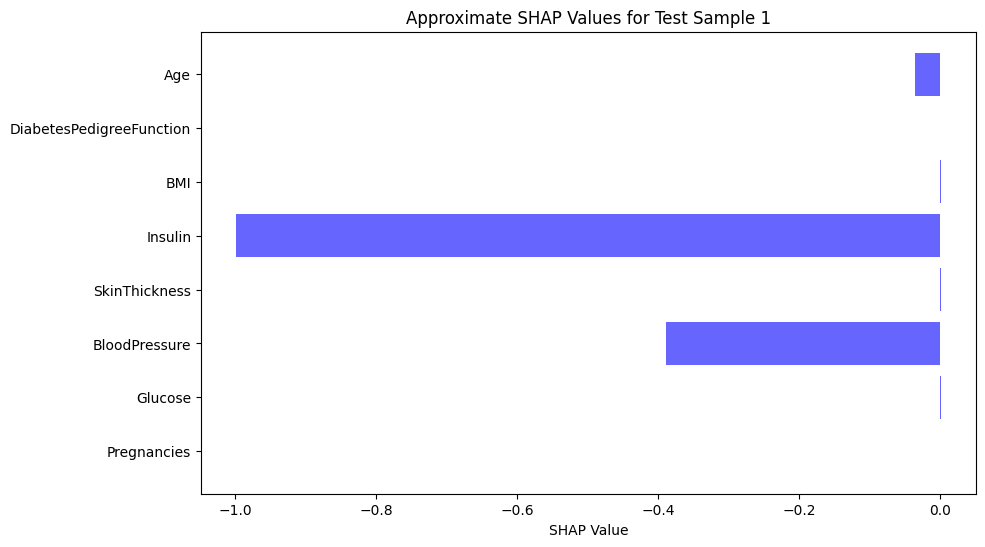

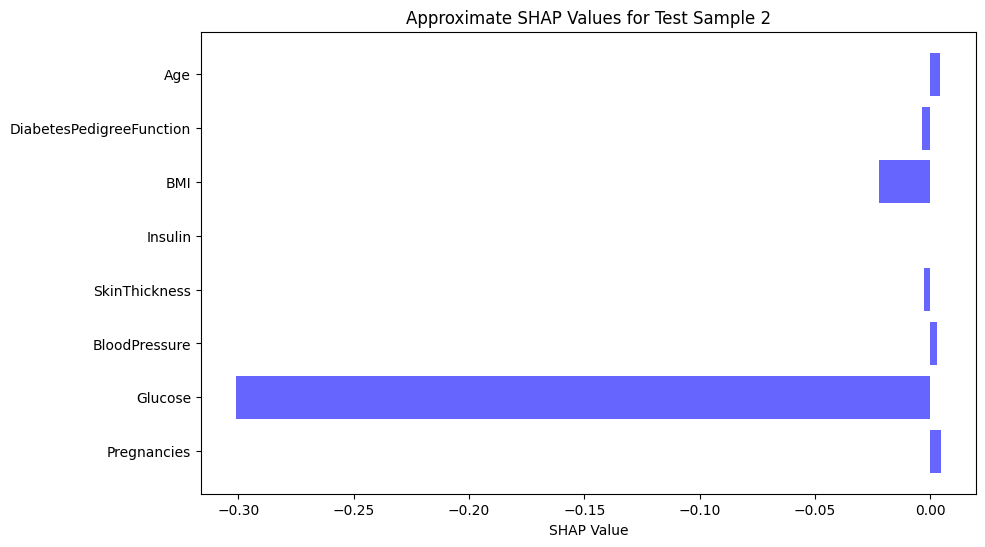

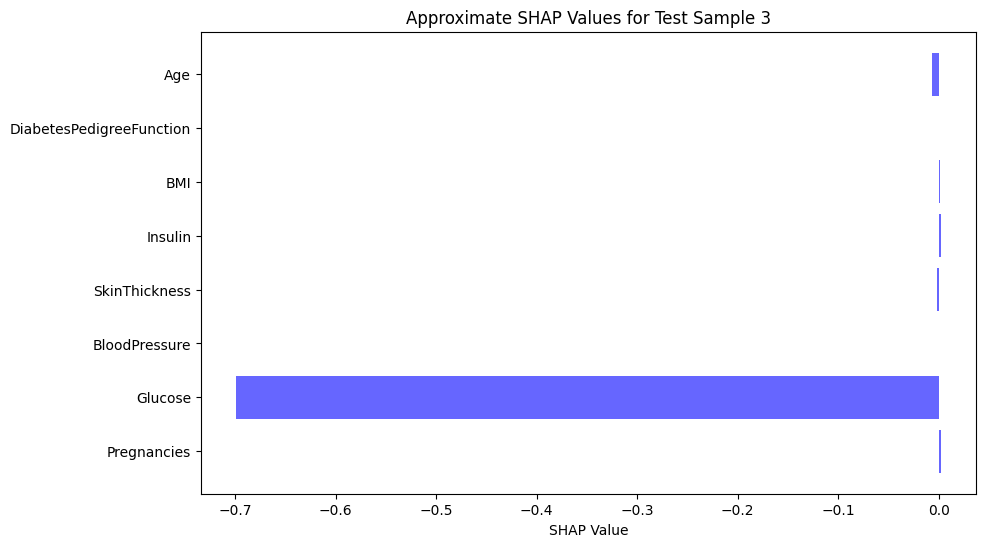

In [ ]:
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt


np.random.seed(42)


def predict_proba(X):
    model.eval()
    with torch.no_grad():
        X_tensor = torch.tensor(np.array(X), dtype=torch.float32)
        outputs = torch.sigmoid(model(X_tensor)).numpy()
    return outputs


random_indices = np.random.choice(X_test.shape[0], 3, replace=False)
random_samples = X_test[random_indices].numpy()
random_samples_df = pd.DataFrame(random_samples, columns=train_data.columns[:-1])


baseline_predictions = predict_proba(random_samples)


feature_medians = np.median(X_train.numpy(), axis=0)


approx_shap_values = []
for sample, baseline_prediction in zip(random_samples, baseline_predictions):
    sample_shap_values = []
    for i, feature_value in enumerate(sample):
        perturbed_sample = sample.copy()
        perturbed_sample[i] = feature_medians[i]
        perturbed_prediction = predict_proba([perturbed_sample])[0]
        shap_value = baseline_prediction[0] - perturbed_prediction[0]
        sample_shap_values.append(shap_value)
    approx_shap_values.append(sample_shap_values)


approx_shap_values = np.array(approx_shap_values)


for i, sample_shap_values in enumerate(approx_shap_values):
    plt.figure(figsize=(10, 6))
    plt.barh(train_data.columns[:-1], sample_shap_values, color='b', alpha=0.6)
    plt.xlabel('SHAP Value')
    plt.title(f'Approximate SHAP Values for Test Sample {i+1}')
    plt.show()


Code to Manually Replace Feature Value and Check Impact

In [ ]:

def check_feature_impact(sample, feature_index, new_value):
    modified_sample = sample.copy()
    modified_sample[feature_index] = new_value
    original_prediction = predict_proba([sample])[0]
    new_prediction = predict_proba([modified_sample])[0]
    impact = original_prediction - new_prediction
    return impact


sample_index = 0
feature_index = 1
original_value = random_samples[sample_index][feature_index]
new_value = np.median(X_train.numpy(), axis=0)[feature_index]
impact = check_feature_impact(random_samples[sample_index], feature_index, new_value)

print(f"Original 'Glucose' value: {original_value}")
print(f"New 'Glucose' value: {new_value}")
print(f"Impact on prediction: {impact}")


Original 'Glucose' value: 1.6879140138626099
New 'Glucose' value: -0.15307314693927765
Impact on prediction: [0.00096182]


Calculating feature importance values ​​with LIME

In [15]:
import lime
import lime.lime_tabular

np.random.seed(42)
def predict_proba(X):
    model.eval()
    with torch.no_grad():
        X_tensor = torch.tensor(X, dtype=torch.float32)
        logits = model(X_tensor)
        probs = torch.sigmoid(logits).numpy()
        return np.hstack((1 - probs, probs))

explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train,
    feature_names=features.columns,
    class_names=['No Diabetes', 'Diabetes'],
    mode='classification'
)

random_indices = np.random.choice(X_test.shape[0], 3, replace=False)
random_samples = X_test[random_indices]

lime_explanations = []
for sample in random_samples:
    exp = explainer.explain_instance(
        data_row=sample,
        predict_fn=predict_proba
    )
    lime_explanations.append(exp.as_list())

for i, explanation in enumerate(lime_explanations):
    print(f"LIME Explanation for Test Sample {i+1}:")
    for feature, importance in explanation:
        print(f"{feature}: {importance}")


LIME Explanation for Test Sample 1:
Glucose > 0.64: 0.40995815336007
Age <= -0.79: -0.11903659836260469
-0.01 < BMI <= 0.57: 0.07731029202685209
-0.84 < Pregnancies <= -0.25: -0.06709573006108592
-0.68 < DiabetesPedigreeFunction <= -0.26: -0.0482191832927338
SkinThickness > 0.33: -0.0360314380496804
BloodPressure > 0.63: -0.02974582186899521
Insulin > -0.12: 0.00823953369565737
LIME Explanation for Test Sample 2:
Glucose <= -0.74: -0.2924328607119925
BMI <= -0.68: -0.2811960646724459
-0.28 < Age <= 0.66: 0.08552029554125462
-0.22 < Insulin <= -0.18: 0.06560505239493479
-0.68 < DiabetesPedigreeFunction <= -0.26: -0.04440150289085746
-0.25 < Pregnancies <= 0.64: -0.037490797274519864
-0.03 < BloodPressure <= 0.63: 0.029312429319239133
-0.01 < SkinThickness <= 0.33: 0.020616733793019332
LIME Explanation for Test Sample 3:
-0.74 < Glucose <= -0.15: -0.14500107549116953
Pregnancies > 0.64: 0.13149699632062192
DiabetesPedigreeFunction <= -0.68: -0.1012574727722195
-0.01 < BMI <= 0.57: 0.0650

Calculating feature importance values ​​with SHAP

In [7]:
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt


np.random.seed(42)


def predict_proba(X):
    model.eval()
    with torch.no_grad():
        X_tensor = torch.tensor(np.array(X), dtype=torch.float32)
        outputs = torch.sigmoid(model(X_tensor)).numpy()
    return outputs


random_indices = np.random.choice(X_test.shape[0], 3, replace=False)
random_samples = X_test[random_indices].numpy()
random_samples_df = pd.DataFrame(random_samples, columns=train_data.columns[:-1])

baseline_predictions = predict_proba(random_samples)

feature_medians = np.median(X_train.numpy(), axis=0)

approx_shap_values = []
for sample, baseline_prediction in zip(random_samples, baseline_predictions):
    sample_shap_values = []
    for i, feature_value in enumerate(sample):
        perturbed_sample = sample.copy()
        perturbed_sample[i] = feature_medians[i]
        perturbed_prediction = predict_proba([perturbed_sample])[0]
        shap_value = baseline_prediction[0] - perturbed_prediction[0]
        sample_shap_values.append(shap_value)
    approx_shap_values.append(sample_shap_values)

shap_values = np.array(approx_shap_values)

for i, shap_value in enumerate(shap_values):
    print(f"SHAP Explanation for Test Sample {i+1}:")
    for feature, importance in zip(features.columns, shap_value):
        print(f"{feature}: {importance}")


SHAP Explanation for Test Sample 1:
Pregnancies: -7.82310962677002e-08
Glucose: 0.050777554512023926
BloodPressure: -0.9393954277038574
SkinThickness: 0.044356219470500946
Insulin: -0.9451725482940674
BMI: 0.05055510252714157
DiabetesPedigreeFunction: -0.0810355693101883
Age: -0.9435505270957947
SHAP Explanation for Test Sample 2:
Pregnancies: 0.005909996572881937
Glucose: -0.6873607039451599
BloodPressure: -0.0010796203278005123
SkinThickness: -0.0028118565678596497
Insulin: 5.587935447692871e-09
BMI: -0.16496138274669647
DiabetesPedigreeFunction: -0.045372121036052704
Age: 0.005853702779859304
SHAP Explanation for Test Sample 3:
Pregnancies: 1.897990955512796e-06
Glucose: -0.00030851532937958837
BloodPressure: -0.00012885720934718847
SkinThickness: -0.009711782447993755
Insulin: 1.892963837235584e-06
BMI: 1.036522689901176e-06
DiabetesPedigreeFunction: 5.73877969145542e-07
Age: -1.8617558453115635e-05


# part 3: NAM model

Epoch 1/100, Train Loss: 0.9039, Validation Loss: 0.8680
Epoch 2/100, Train Loss: 0.8624, Validation Loss: 0.8350
Epoch 3/100, Train Loss: 0.8292, Validation Loss: 0.8085
Epoch 4/100, Train Loss: 0.8022, Validation Loss: 0.7867
Epoch 5/100, Train Loss: 0.7798, Validation Loss: 0.7685
Epoch 6/100, Train Loss: 0.7608, Validation Loss: 0.7533
Epoch 7/100, Train Loss: 0.7445, Validation Loss: 0.7406
Epoch 8/100, Train Loss: 0.7304, Validation Loss: 0.7301
Epoch 9/100, Train Loss: 0.7186, Validation Loss: 0.7221
Epoch 10/100, Train Loss: 0.7087, Validation Loss: 0.7157
Epoch 11/100, Train Loss: 0.7005, Validation Loss: 0.7109
Epoch 12/100, Train Loss: 0.6937, Validation Loss: 0.7074
Epoch 13/100, Train Loss: 0.6877, Validation Loss: 0.7046
Epoch 14/100, Train Loss: 0.6824, Validation Loss: 0.7022
Epoch 15/100, Train Loss: 0.6774, Validation Loss: 0.7003
Epoch 16/100, Train Loss: 0.6727, Validation Loss: 0.6987
Epoch 17/100, Train Loss: 0.6683, Validation Loss: 0.6975
Epoch 18/100, Train Los

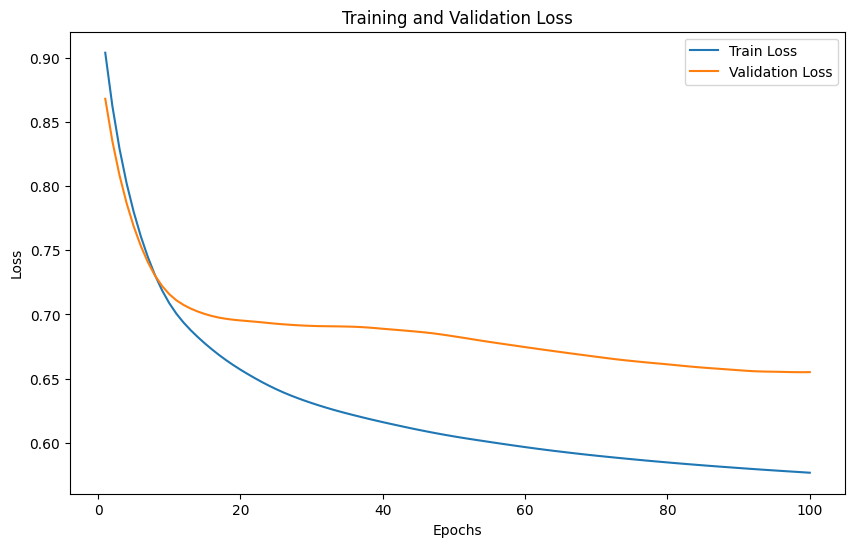

Accuracy: 0.7662
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.84      0.82        50
         1.0       0.68      0.63      0.65        27

    accuracy                           0.77        77
   macro avg       0.74      0.73      0.74        77
weighted avg       0.76      0.77      0.76        77

Confusion Matrix:
[[42  8]
 [10 17]]


In [11]:
import numpy as np
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt


np.random.seed(42)
torch.manual_seed(42)

scaler = StandardScaler()
features = diabetes_data.drop(columns=['Outcome'])
scaled_features = scaler.fit_transform(features)
scaled_data = pd.DataFrame(scaled_features, columns=features.columns)
scaled_data['Outcome'] = diabetes_data['Outcome']

train_data, temp_data = train_test_split(scaled_data, test_size=0.30, stratify=scaled_data['Outcome'], random_state=42)
validation_data, test_data = train_test_split(temp_data, test_size=0.33, stratify=temp_data['Outcome'], random_state=42)

X_train = train_data.drop(columns=['Outcome']).values
y_train = train_data['Outcome'].values
X_val = validation_data.drop(columns=['Outcome']).values
y_val = validation_data['Outcome'].values
X_test = test_data.drop(columns=['Outcome']).values
y_test = test_data['Outcome'].values

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

class_counts = np.bincount(y_train.astype(int))
total_counts = len(y_train)
class_weights = [total_counts / class_counts[0], total_counts / class_counts[1]]
pos_weight = torch.tensor(class_weights[1] / class_weights[0], dtype=torch.float32)

class NAM(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(NAM, self).__init__()
        self.feature_nets = nn.ModuleList([nn.Sequential(
            nn.Linear(1, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 1)
        ) for _ in range(input_dim)])

    def forward(self, x):
        outputs = []
        for i, net in enumerate(self.feature_nets):
            outputs.append(net(x[:, i:i+1]))
        return torch.sum(torch.cat(outputs, dim=1), dim=1, keepdim=True)

input_dim = X_train.shape[1]
hidden_dim = 50
model = NAM(input_dim=input_dim, hidden_dim=hidden_dim)

optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

num_epochs = 100
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    train_loss = criterion(outputs, y_train_tensor)
    train_loss.backward()
    optimizer.step()
    train_losses.append(train_loss.item())


    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)
        val_losses.append(val_loss.item())

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_predictions = torch.round(torch.sigmoid(test_outputs))
    test_predictions_np = test_predictions.numpy().flatten()
    y_test_np = y_test_tensor.numpy().flatten()

    accuracy = accuracy_score(y_test_np, test_predictions_np)
    class_report = classification_report(y_test_np, test_predictions_np)
    conf_matrix = confusion_matrix(y_test_np, test_predictions_np)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(class_report)
print("Confusion Matrix:")
print(conf_matrix)
